In [1]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
win = pd.read_csv("Datasets\wine.csv")
win.head()

,Class,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoid,Proanthocyanins,Intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [10]:
win["Class"].value_counts()

2    71
1    59
3    48
Name: Class, dtype: int64

In [20]:
# Dropping class variable
wine = win.drop("Class", axis = 1)
wine.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoid,Proanthocyanins,Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# Using Pipeline
from sklearn.pipeline import Pipeline

pca = PCA()
scaler = StandardScaler()
pipe = Pipeline(["Scaling", scaler],
               ["", ])

In [14]:
scaler = StandardScaler()
scaler.fit(wine)
wine_scaled = scaler.fit_transform(wine)

pca = PCA()

prin_comp = pca.fit_transform(wine_scaled)

In [16]:

pd_PC = pd.DataFrame(prin_comp,
                    columns = [ "PC"+ str(i) for i in range(1,14) ])


In [17]:
print(pca.explained_variance_ratio_*100)

[36.19827807 19.20793023 11.12355281  7.06984848  6.56304838  4.93578254
  4.2387429   2.68125013  2.22201296  1.92951266  1.73681912  1.29805828
  0.79516344]


In [18]:
pd_PC["Class"] = win["Class"]

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

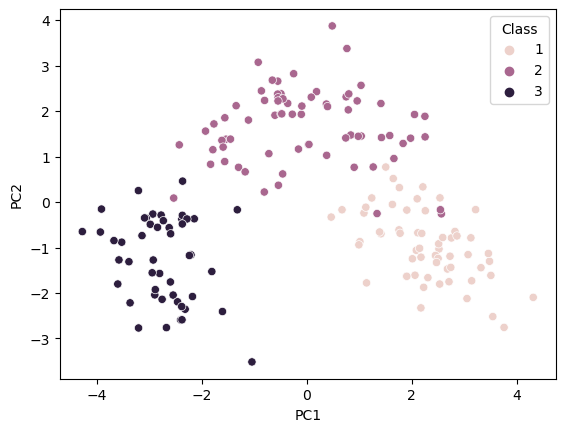

In [19]:
sns.scatterplot(data = pd_PC,
               x = "PC1",
               y = "PC2",
               hue = "Class")